In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import scipy.stats as stats

sns.set_style('white')

data = pd.read_csv('avocado.csv')
df = pd.DataFrame(data)
#Clean up certain names, some of the data wasn't titled the way I liked, this changed that.
df['region'] = df['region'].str.replace("BaltimoreWashington", "Baltimore")
df['region'] = df['region'].str.replace("BuffaloRochester", "Buffalo")
df['region'] = df['region'].str.replace("CincinnatiDayton", "Cincinnati")
df['region'] = df['region'].str.replace("DallasFtWorth", "Dallas")
df['region'] = df['region'].str.replace("HarrisburgScranton", "Harrisburg")
df['region'] = df['region'].str.replace("HartfordSpringfield", "Hartford")
df['region'] = df['region'].str.replace("MiamiFtLauderdale", "Miami")
df['region'] = df['region'].str.replace("NewOrleansMobile", "NewOrleans")
df['region'] = df['region'].str.replace("PhoenixTucson", "Phoenix")
df['region'] = df['region'].str.replace("RaleighGreensboro", "Raleigh")
df['region'] = df['region'].str.replace("RichmondNorfolk", "Richmond")
df['region'] = df['region'].str.replace("WestTexNewMexico", "NewMexico")


#Remove the data I don't want (States, regions, and totals, only want cities)
#this removes specifc parts of columns, for example here im removing certain states from the 'region' column
#df=df[np.logical_not(df['column you want to access here'].isin(["data in the column you want gone"]))]

df=df[np.logical_not(df['region'].isin(["West", 'California', 'TotalUS', 'Plains', 'Southeast', 'SouthCentral', 'Northeast', 'Midsouth', 'GreatLakes']))]


# Take a subset of the data to make plots clearer.
df_la = df.loc[
    ((df['type'] == 'organic') | (df['type'] == 'conventional')) & (df['region'] == 'LosAngeles'),
    ['type', 'AveragePrice', 'Total Volume', 'Total Bags']
]

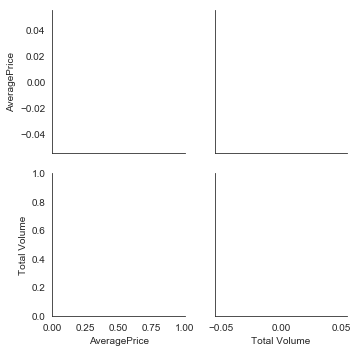

In [91]:
df_jittered = df_la.loc[:, 'AveragePrice':'Total Volume'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.


              AveragePrice  Total Volume  Total Bags
AveragePrice      1.000000     -0.702219   -0.604907
Total Volume     -0.702219      1.000000    0.863383
Total Bags       -0.604907      0.863383    1.000000


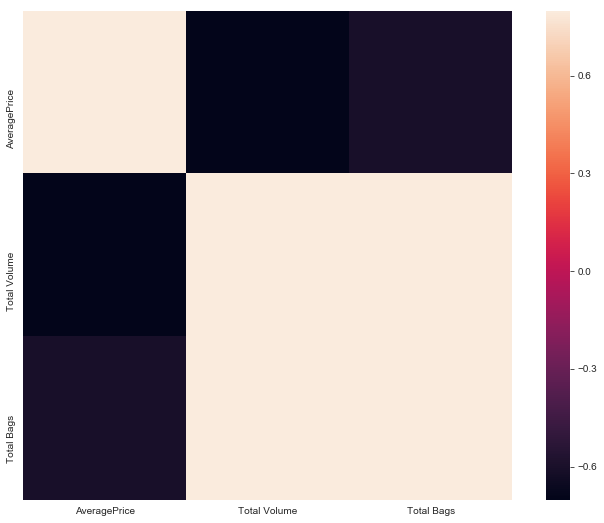

In [23]:
# Make the correlation matrix.
corrmat = df_la.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


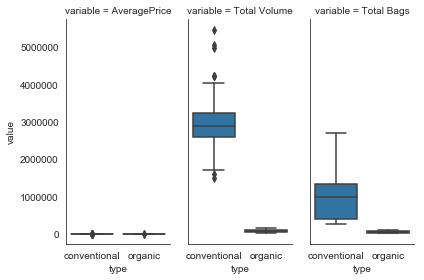

             AveragePrice                                                    \
                    count      mean       std   min   25%   50%   75%   max   
type                                                                          
conventional        169.0  0.976450  0.244190  0.53  0.82  0.94  1.06  1.80   
organic             169.0  1.455562  0.335227  0.96  1.19  1.39  1.66  2.44   

             Total Bags                    ...                              \
                  count           mean     ...             75%         max   
type                                       ...                               
conventional      169.0  953851.225799     ...      1337481.40  2701609.82   
organic           169.0   41796.871420     ...        64291.12   105095.63   

             Total Volume                                           \
                    count          mean            std         min   
type                                                                 
con

In [29]:
# Plot all the variables with boxplots for each country.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_la
df_long = pd.melt(df_long, id_vars=['type'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, 'type', "value")
plt.show()

# Descriptive statistics by group.
print(df_la.groupby('type').describe())

# Test whether group differences are significant.
for col in df_la.loc[:,'AveragePrice':'Total Volume'].columns:
    print(col)
    print(stats.ttest_ind(
        df_la[df_la['type'] == 'organic'][col].dropna(),
        df_la[df_la['type'] == 'conventional'][col].dropna()
    ))

In [30]:
#Based on the boxplots above, conventional vs organic values vary wildly in all aspects tested

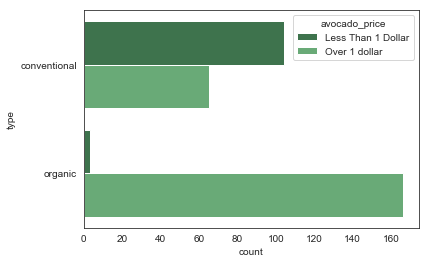

avocado_price  Less Than 1 Dollar  Over 1 dollar
type                                            
conventional                  104             65
organic                         3            166
Power_divergenceResult(statistic=166.2130177514793, pvalue=8.359187400910186e-36)


In [59]:
df_la2 = df.loc[
    ((df['type'] == 'organic') | (df['type'] == 'conventional')) & (df['region'] == 'LosAngeles'),
    ['type', 'AveragePrice']
]
# Create a text variable so that output is easier to interpret.
df_la2['avocado_price'] = None
df_la2.loc[df_la2['AveragePrice'] >= 1, 'avocado_price'] = 'Over 1 dollar'
df_la2.loc[df_la2['AveragePrice'] <= .99, 'avocado_price'] = 'Less Than 1 Dollar'

# Plot counts for each combination of levels.
sns.countplot(y="type", hue="avocado_price", data=df_la2, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df_la2['type'], df_la2['avocado_price'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

In [55]:
#BREAK

In [56]:
#BREAK
#LETS DO THE FEATURE STUFF

In [63]:
print(df.region.unique())

['Albany' 'Atlanta' 'Baltimore' 'Boise' 'Boston' 'Buffalo' 'Charlotte'
 'Chicago' 'Cincinnati' 'Columbus' 'Dallas' 'Denver' 'Detroit'
 'GrandRapids' 'Harrisburg' 'Hartford' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'Miami' 'Nashville'
 'NewOrleans' 'NewYork' 'NorthernNewEngland' 'Orlando' 'Philadelphia'
 'Phoenix' 'Pittsburgh' 'Portland' 'Raleigh' 'Richmond' 'Roanoke'
 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle' 'SouthCarolina'
 'Spokane' 'StLouis' 'Syracuse' 'Tampa' 'NewMexico']


In [65]:
# Making dummies.
# Also creating a data frame to hold our features.
features = pd.get_dummies(df['region'])

# California countries dummy.
features['California'] = np.where((df['region'].isin(['LosAngeles', 'Sacramento', 'SanDiego', 'SanFrancisco'])), 1, 0)

print(pd.crosstab(features['California'], df['region']))

region      Albany  Atlanta  Baltimore  Boise  Boston  Buffalo  Charlotte  \
California                                                                  
0              338      338        338    338     338      338        338   
1                0        0          0      0       0        0          0   

region      Chicago  Cincinnati  Columbus  ...    Roanoke  Sacramento  \
California                                 ...                          
0               338         338       338  ...        338           0   
1                 0           0         0  ...          0         338   

region      SanDiego  SanFrancisco  Seattle  SouthCarolina  Spokane  StLouis  \
California                                                                     
0                  0             0      338            338      338      338   
1                338           338        0              0        0        0   

region      Syracuse  Tampa  
California                   
0                

In [66]:
features['avocado_1dollar'] = np.where(df['AveragePrice']>=1, 1, 0)

# Check to make sure it worked.
print(df['AveragePrice'].groupby(features['avocado_1dollar']).describe())

                   count      mean       std   min   25%   50%   75%   max
avocado_1dollar                                                           
0                 2322.0  0.858609  0.111945  0.44  0.79  0.89  0.95  0.99
1                12885.0  1.514751  0.364892  1.00  1.22  1.46  1.74  3.25


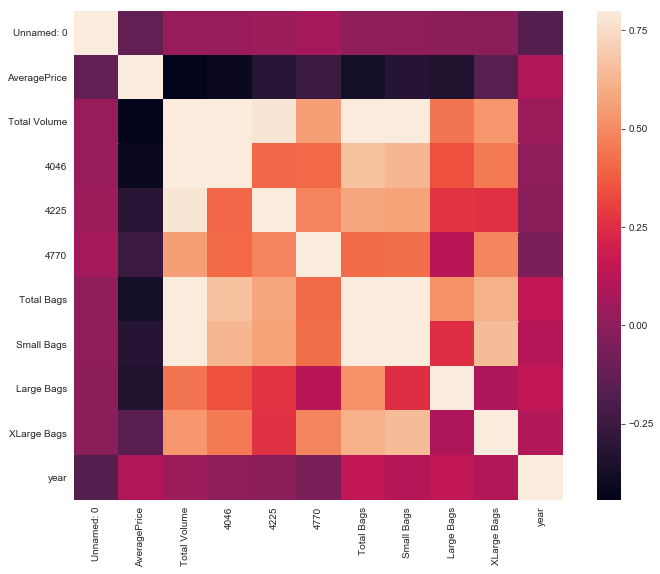

In [67]:
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

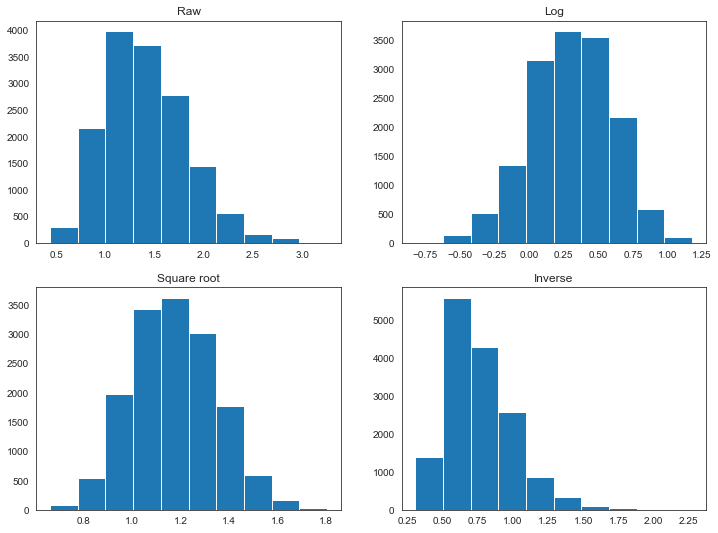

<Figure size 432x288 with 0 Axes>

In [94]:
#NON NORMALITY
# Making a four-panel plot.

fig = plt.figure(figsize=(12, 9))

fig.add_subplot(221)
plt.hist(df['AveragePrice'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['AveragePrice'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['AveragePrice'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['AveragePrice'].dropna())
plt.title('Inverse')
plt.show()

plt.tight_layout()

# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.

features['log_price'] = np.log(df['AveragePrice'])

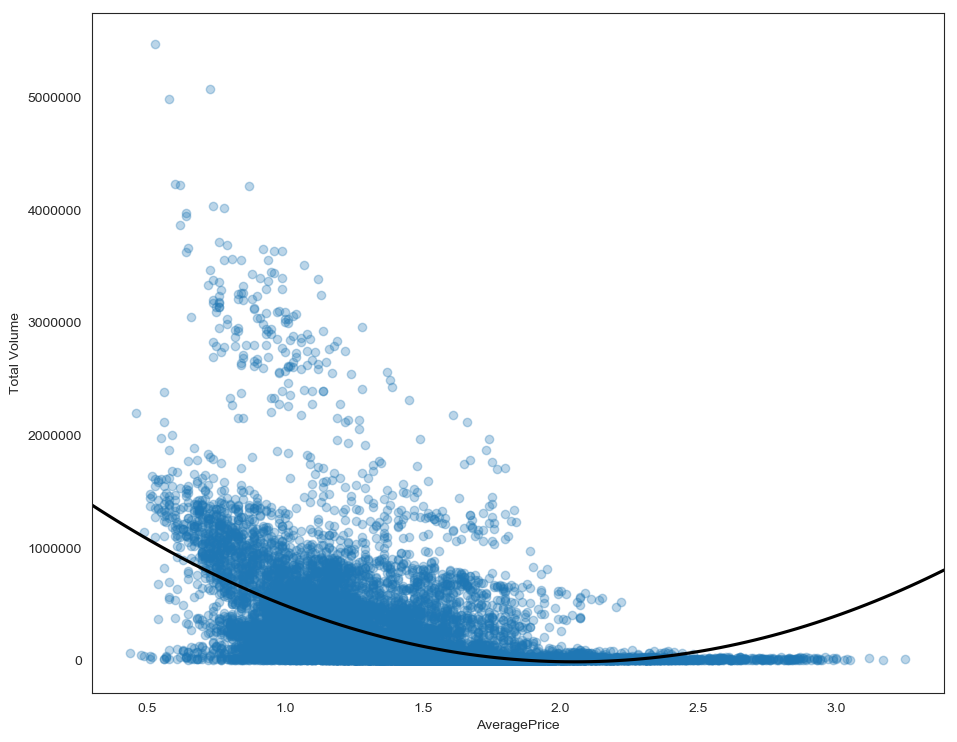

In [81]:
figure(num=None, figsize=(11, 9), dpi=100, facecolor='w', edgecolor='k')
sns.regplot(
    df['AveragePrice'],
    y=df['Total Volume'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['price_squared'] = df['AveragePrice'] * df['AveragePrice']

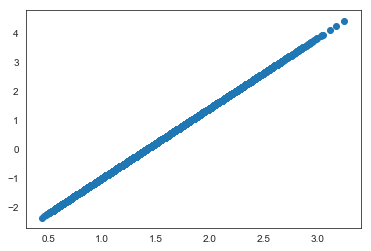

         Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  1.520700e+04  1.520700e+04  1.520700e+04  1.520700e+04  1.520700e+04   
mean  -2.862400e-16  1.604308e-15  1.900878e-15 -9.539070e-16 -4.540401e-16   
std    1.000033e+00  1.000033e+00  1.000033e+00  1.000033e+00  1.000033e+00   
min   -1.565323e+00 -2.360749e+00 -5.741784e-01 -4.098476e-01 -5.365058e-01   
25%   -9.193316e-01 -7.619870e-01 -5.547254e-01 -4.071168e-01 -5.238682e-01   
50%   -1.494441e-02 -1.079480e-01 -4.256431e-01 -3.869594e-01 -4.311094e-01   
75%    8.894428e-01  6.429857e-01  1.517434e-01 -2.344389e-02  3.783394e-02   
max    1.793830e+00  4.446102e+00  1.201936e+01  1.426958e+01  1.319986e+01   

               4770    Total Bags    Small Bags    Large Bags   XLarge Bags  \
count  1.520700e+04  1.520700e+04  1.520700e+04  1.520700e+04  1.520700e+04   
mean  -1.101303e-14  1.906660e-16 -9.224262e-16 -2.924799e-15  1.215162e-14   
std    1.000033e+00  1.000033e+00  1.000033e+00  1.

In [82]:
from sklearn import preprocessing
# Select only numeric variables to scale.
df_num = df.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(df_num['AveragePrice'], df_scaled['AveragePrice'])
plt.show()

# Lookit all those matching means and standard deviations!
print(df_scaled.describe())

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


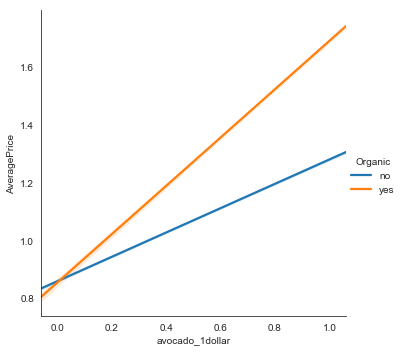

In [84]:
# Create a better indicator for 'type.' Currently it is coded organic for
# organic and conventional for conventional.
features['Organic'] = np.where(df['type'] == 'organic', 'yes', 'no')

# Create the interaction.
features['higher_price'] = features['avocado_1dollar'] * features['Organic']

# A plot of an interaction.
# Add the 'AveragePrice' feature to the features data frame for plotting.
features['AveragePrice'] = df['AveragePrice']
sns.lmplot(
    x='avocado_1dollar',
    y='AveragePrice',
    hue='Organic',
    data=features,
    scatter=False
)
plt.show()

In [92]:
#features['Organic']
#features['avocado_1dollar']
#features['price_squared']
#features['log_price']
#features['higher_price']
#features['AveragePrice']
#features['California']

In [101]:
features['higher_price'].dropna()

0         no
1         no
2           
3         no
4         no
5         no
6           
7           
8         no
9         no
10        no
11        no
12        no
13          
14        no
15        no
16        no
17        no
18        no
19        no
20        no
21        no
22        no
23        no
24        no
25        no
26        no
27        no
28        no
29        no
        ... 
18195    yes
18196    yes
18197    yes
18198    yes
18199    yes
18200    yes
18201    yes
18202    yes
18203    yes
18204    yes
18205    yes
18206    yes
18207    yes
18208    yes
18209    yes
18210    yes
18211    yes
18212    yes
18237    yes
18238    yes
18239    yes
18240    yes
18241    yes
18242    yes
18243    yes
18244    yes
18245    yes
18246    yes
18247    yes
18248    yes
Name: higher_price, Length: 15207, dtype: object